<a href="https://colab.research.google.com/github/NoeliaDuranL/SIS420/blob/main/laboratorio_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [87]:
# utilizado para manejos de directorios y rutas
import os

# Computacion vectorial y cientifica para python
import numpy as np

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot

import pandas as pd

# Lectura de datos

In [88]:
# Leer datos
data = pd.read_csv('/content/drive/MyDrive/SIS420/datasets/Phising_dataset_predict.csv', delimiter=',')

# Seleccionar características relevantes (excluyendo 'IpAddress' y 'HttpsInHostname')
X = data[['NumDots', 'NumDash', 'NumPercent', 'PathLevel','PathLength','NumNumericChars']]

# Seleccionar etiquetas
y = data['UrlLength']

# Obtener el tamaño del conjunto de datos
m = y.size



In [81]:
X.shape

(662591, 6)

# Normalización de Características

In [90]:
def normalizarCaracteristicas(X):
    X_norm = X.copy()
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

# Normalizar características
X_norm, mu, sigma = normalizarCaracteristicas(X)

#

In [91]:

X_norm, mu, sigma = normalizarCaracteristicas(X)

print(X)
print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)
print(X_norm)

        NumDots  NumDash  NumPercent  PathLevel  PathLength  NumNumericChars
0             3        0           0          5          44                0
1             3        0           0          3          16               41
2             3        0           0          2          24                0
3             3        1           0          6          50                0
4             3        0           0          4          29                2
...         ...      ...         ...        ...         ...              ...
662586        3        0           0          4          39                1
662587        2        2           0          4          44                1
662588        2        0           0          4          42                1
662589        2        0           0          3          45                0
662590        2        0           0          3          41                0

[662591 rows x 6 columns]
Media calculada: NumDots             2.199308
Num

In [92]:
def graficarDatos(x, y, xlabel, ylabel):
  fig = pyplot.figure()
  pyplot.plot(x, y, 'ro')
  pyplot.xlabel(xlabel)
  pyplot.ylabel(ylabel)

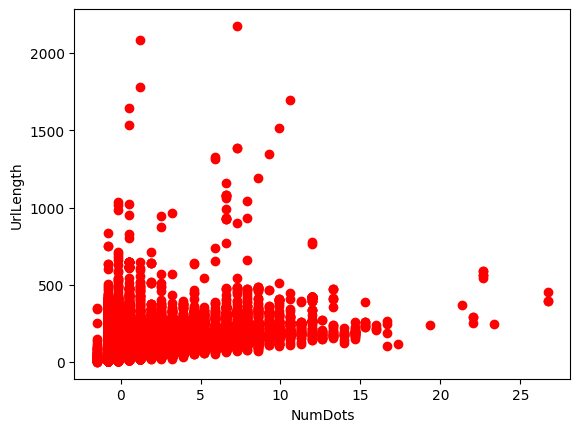

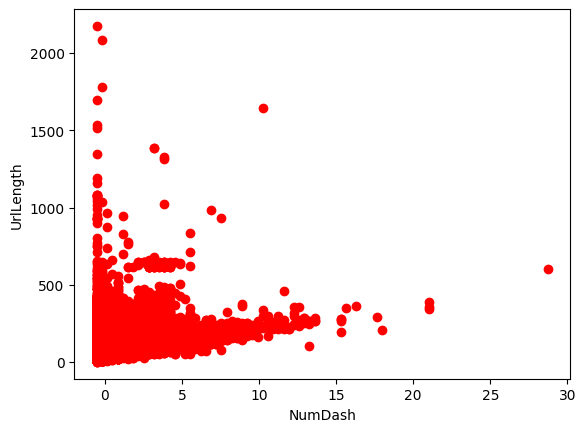

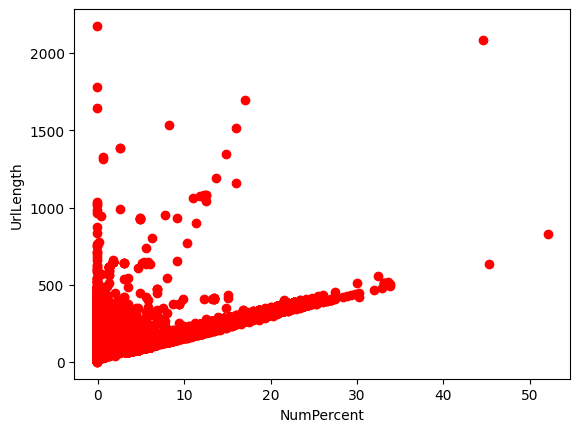

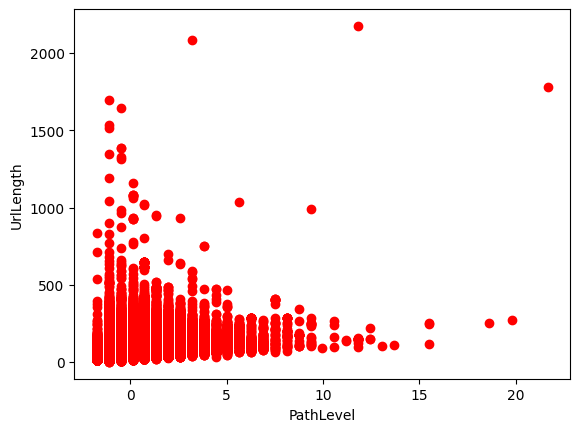

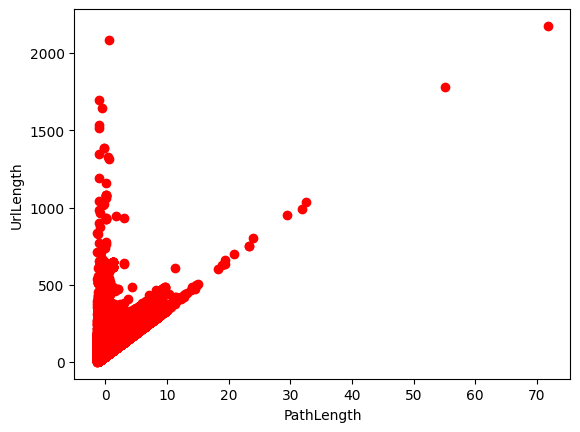

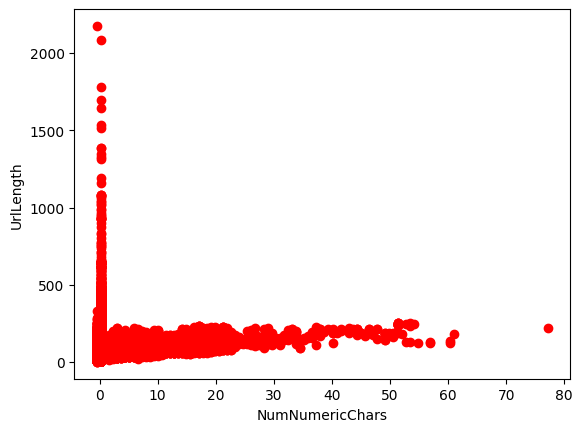

In [102]:
xlabel1 = 'NumDots'
xlabel2 = 'NumDash'
xlabel3 = 'NumPercent'
xlabel4 = 'PathLevel'
xlabel5 = 'PathLength'
xlabel6 = 'NumNumericChars'

ylabel1 = 'UrlLength'

graficarDatos(X_norm['NumDots'], y, xlabel1, ylabel1)
graficarDatos(X_norm['NumDash'], y, xlabel2, ylabel1)
graficarDatos(X_norm['NumPercent'], y, xlabel3, ylabel1)
graficarDatos(X_norm['PathLevel'], y, xlabel4, ylabel1)
graficarDatos(X_norm['PathLength'], y, xlabel5, ylabel1)
graficarDatos(X_norm['NumNumericChars'], y, xlabel6, ylabel1)



In [103]:
# No olvidarse agregar unos a la matriz de x

X_ready = np.concatenate([np.ones((m, 1)), X_norm], axis=1)


In [104]:
def calcularCosto(X, y, theta):
  m = y.size
  J = 0
  h = np.dot(X, theta)
  # print(h)
  J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))
  return J

In [106]:
theta=np.array([0.1, 0.2,0.3,0.4,0.5,0.6,0.7])
JJ = calcularCosto(X_ready, y, theta)
print(f"con theta:{ theta } se obtiene un costo de: {JJ}")

con theta:[0.1 0.2 0.3 0.4 0.5 0.6 0.7] se obtiene un costo de: 2765.3399751476213


In [164]:
def calcularDescensoGradiente(X, y, theta, alpha, numero_iteraciones):
  m = y.shape[0]
  theta = theta.copy()
  J_historico = []

  for i in range(numero_iteraciones):
    theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
    J_historico.append(calcularCosto(X, y, theta))

  return theta, J_historico

los valores de theta calculados son: [5.73420226 1.61135687 1.75610535 1.26520633 0.89533903 2.04783027
 0.82550847]
con un costo de: 2350.7621322071095 


Text(0, 0.5, 'Costo J')

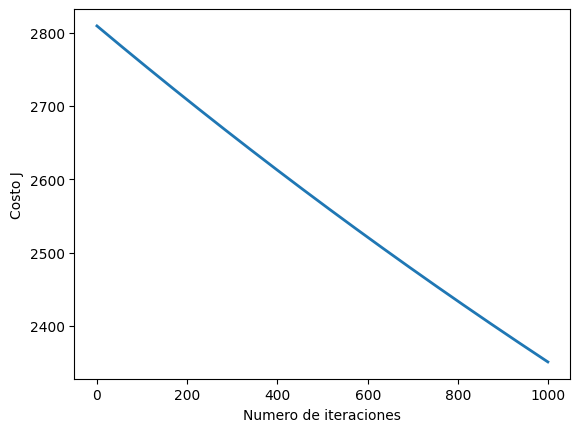

In [173]:
theta = np.zeros(7)

num_ite = 1000
alpha = 0.0001

theta, J_historico = calcularDescensoGradiente(X_ready, y, theta, alpha, num_ite)
print(f"los valores de theta calculados son: { theta }")
print(f"con un costo de: { J_historico[-1]} ")

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_historico)), J_historico, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')


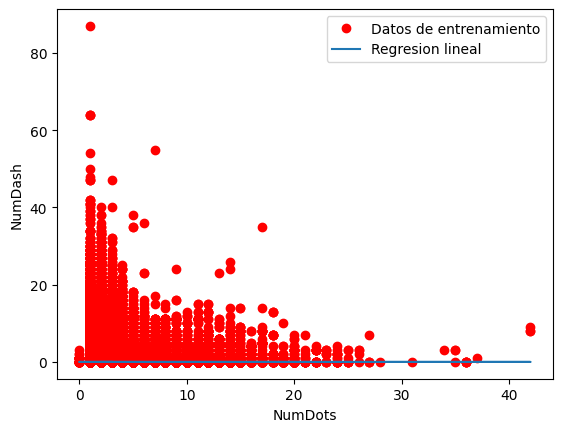

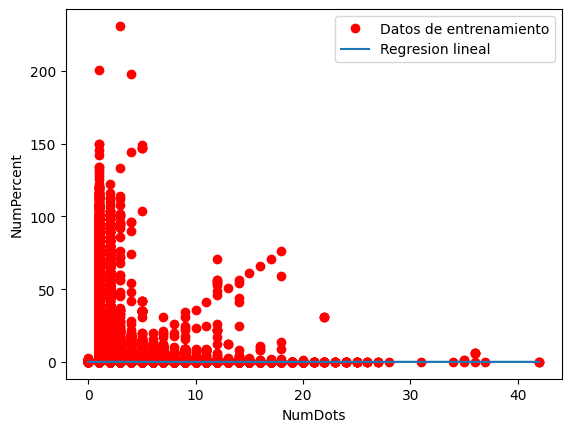

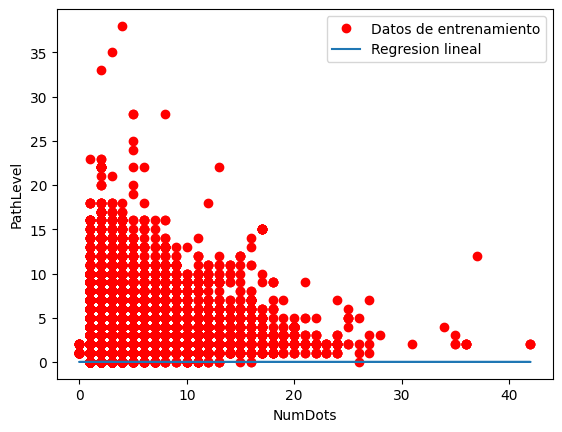

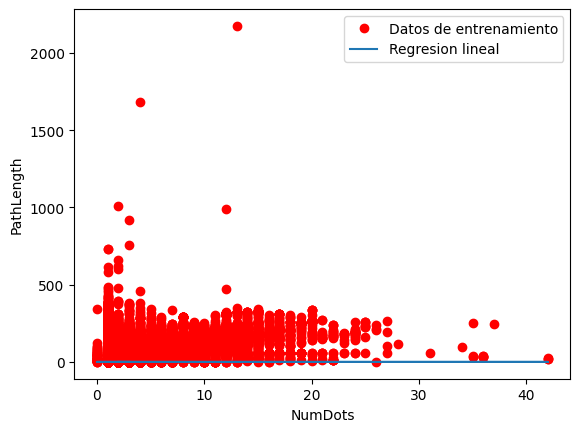

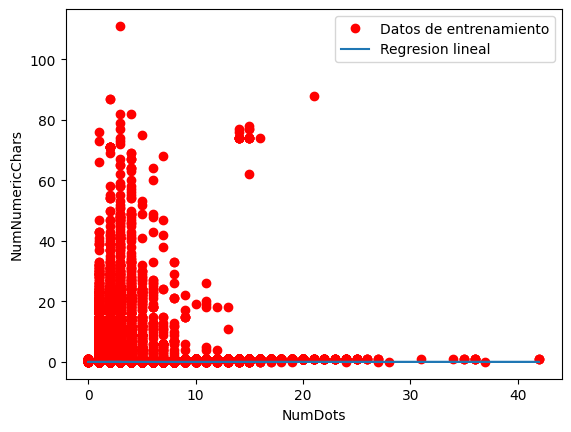

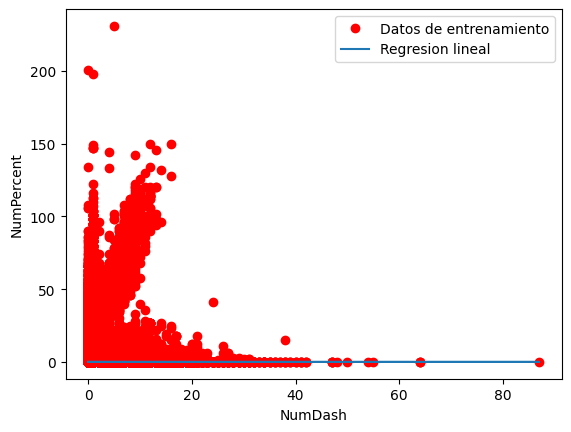

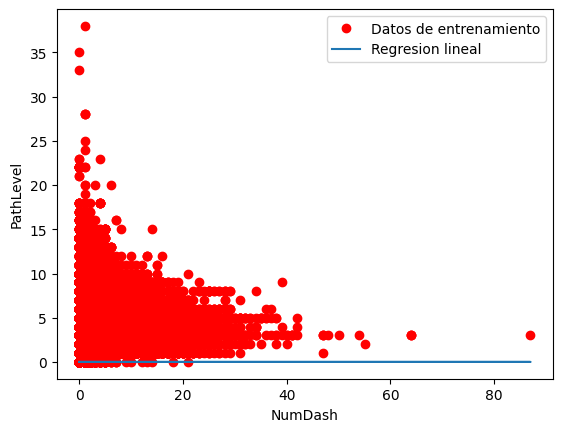

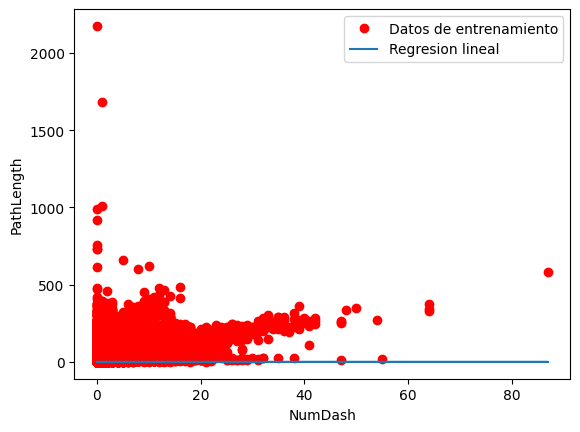

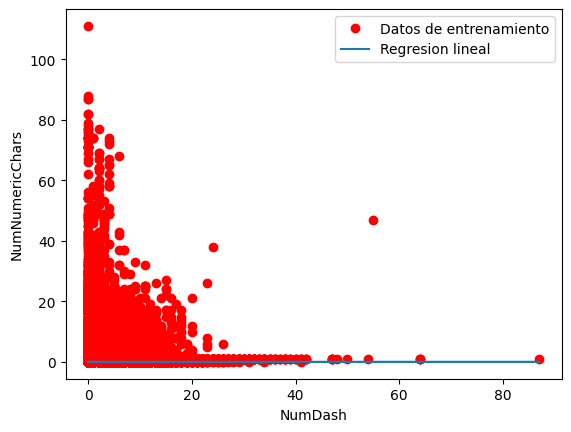

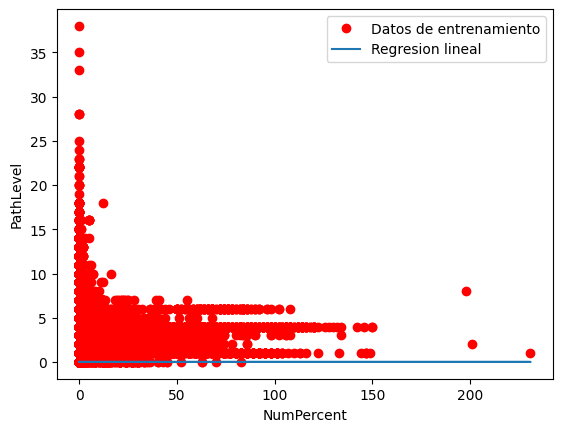

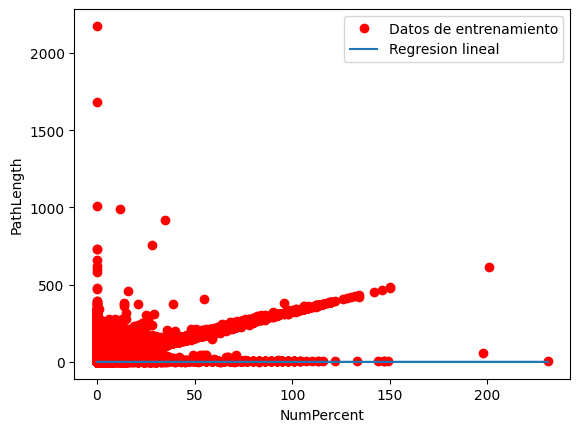

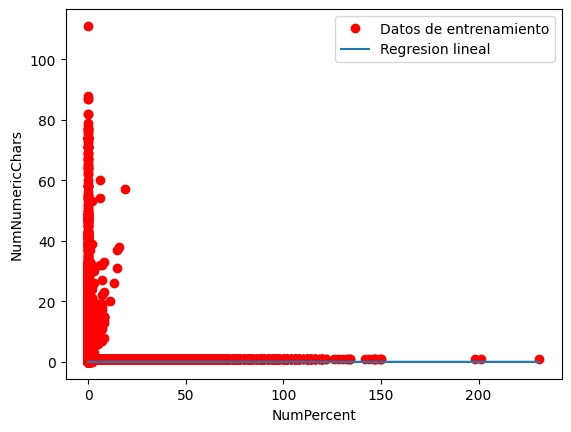

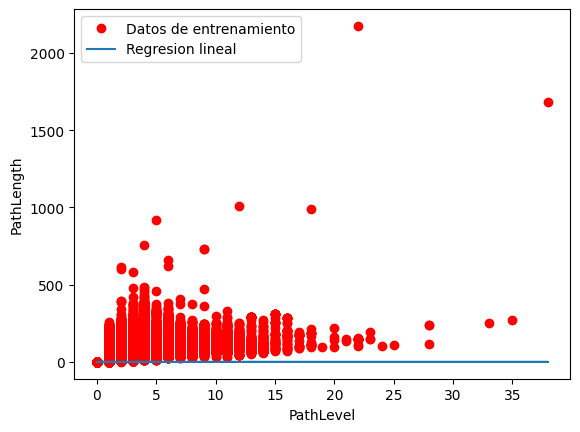

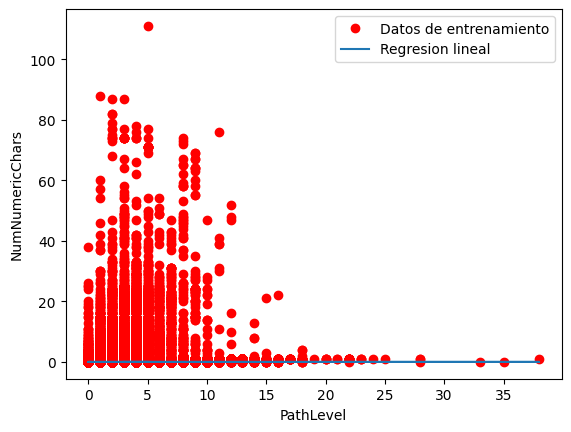

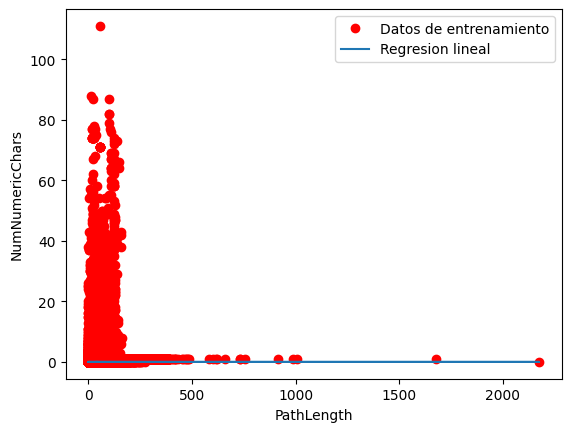

In [130]:
from itertools import combinations

# Combinar todas las características en pares
combinaciones_caracteristicas = list(combinations(X.columns, 2))

# Graficar cada par de características
for caracteristica1, caracteristica2 in combinaciones_caracteristicas:
    graficarDatos(X[caracteristica1], X[caracteristica2], caracteristica1, caracteristica2)
    pyplot.xlabel(caracteristica1)
    pyplot.ylabel(caracteristica2)

    # Calcular y trazar la regresión lineal ajustada
    pyplot.plot(X[caracteristica1], np.dot(X_ready, theta), '-')
    pyplot.legend(['Datos de entrenamiento', 'Regresion lineal'])

# Mostrar todas las gráficas juntas
pyplot.show()

In [174]:
# 2300,4,449900
y_pred = np.dot([1, 25, 4, 46, 76, 12, 7], theta)
print(y_pred)

209.64032559256503


In [175]:
def calcularThethaEcuacionNormal(X, y):
    theta = np.zeros(X.shape[1])
    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)
    return theta

In [176]:
X_ren = np.concatenate([np.ones((m, 1)), X], axis=1)

In [177]:
theta = calcularThethaEcuacionNormal(X_ren, y);
print(f"los valores de theta calculados son: { theta }")

los valores de theta calculados son: [ 8.55480392 11.83127922  5.42544597  2.87122415  2.17414314  0.18565312
  3.23488393]


In [178]:
# Definir el array de características para el nuevo ejemplo
X_array = np.array([26, 205, 52, 6, 6, 26, 79])

# Calcular la longitud de URL predicha utilizando los parámetros óptimos theta
url_length_predicted = np.dot(X_array, theta)

# Imprimir la longitud de URL predicha
print('Longitud de URL predicha para un conjunto de características dado:', url_length_predicted)

Longitud de URL predicha para un conjunto de características dado: 3220.6153483970406
